**Part One: Data Exploration**

1. Read in the dataset, and display some summaries of the data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
costs = pd.read_csv('/content/drive/My Drive/insurance_costs_1.csv')

In [4]:
costs.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


2. Fix any concerns you have about the data.

In [6]:
costs = pd.concat([costs, pd.get_dummies(costs['sex'], drop_first=True, prefix='sex')], axis=1)
costs = costs.drop('sex', axis=1)
costs = pd.concat([costs, pd.get_dummies(costs['smoker'], drop_first=True, prefix='smoker')], axis=1)
costs = costs.drop('smoker', axis=1)

In [7]:
costs = costs.dropna()
costs = costs.rename(columns={'smoker_yes': 'smoker'})
costs.head()

,age,bmi,region,charges,sex_male,smoker
0,19,27.900,southwest,16884.92400,0,1
1,33,22.705,northwest,21984.47061,1,0
2,32,28.880,northwest,3866.85520,1,0
3,31,25.740,southeast,3756.62160,0,0
4,60,25.840,northwest,28923.13692,0,0


3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

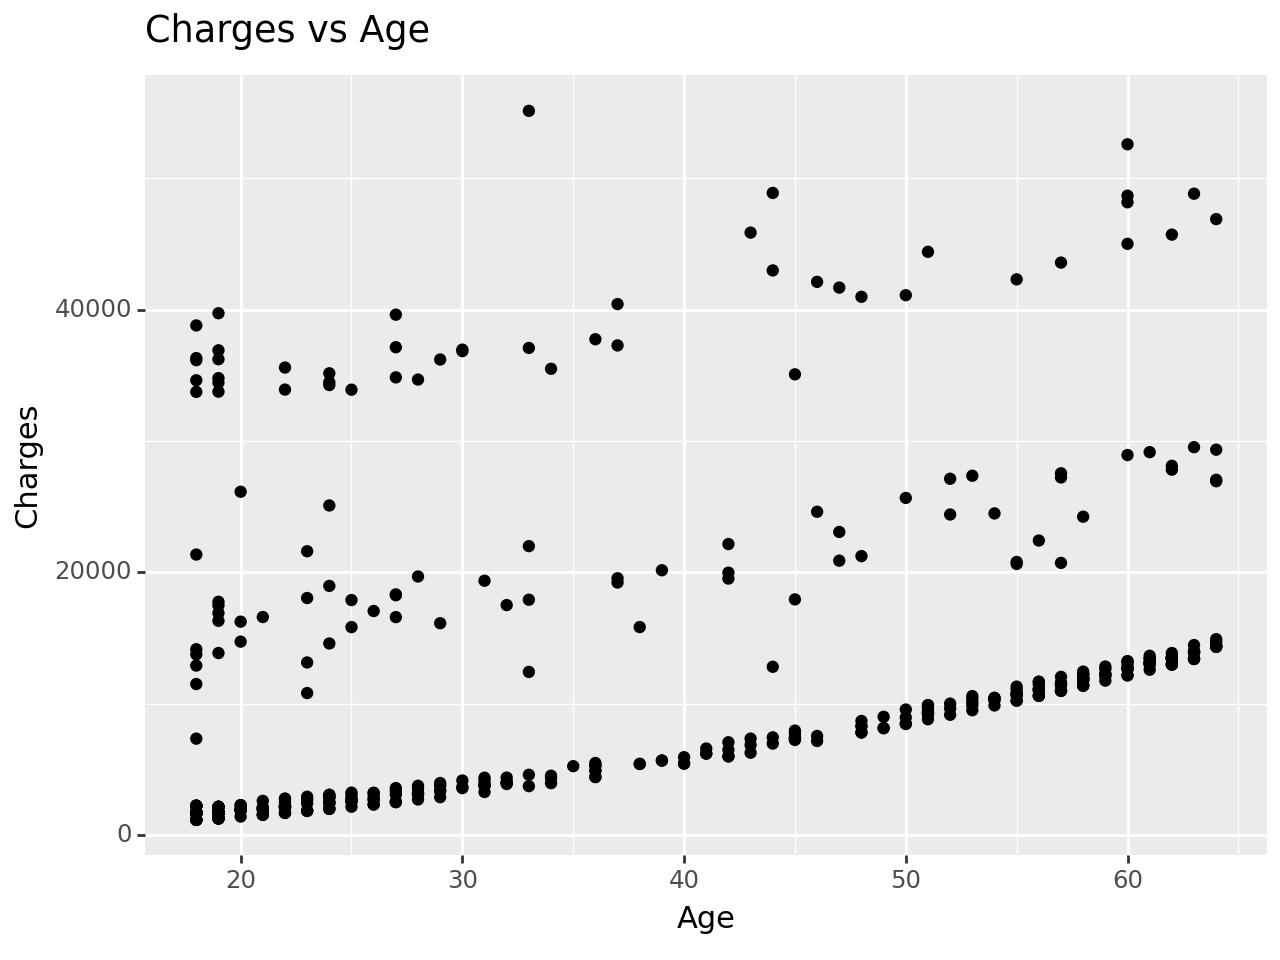

<Figure Size: (640 x 480)>

In [8]:
from plotnine import *
# Charges vs. age plot
plot1 = (ggplot(costs, aes(x='age', y='charges'))
    + geom_point()
    + labs(title='Charges vs Age', x='Age', y='Charges')
)
plot1

For the charges vs. age plot, it seems that there are 3 distinct patterns.  I am sure through further analysis, we will be able to see why there seem to be 3 separate trends in the data.  It would be safe to assume that the bottom line of data points is people who were only charged the base rate for the insurance because there are so many data points gathered in this distinct line, and there are no points below these points.  From the graph we can see that age and charges are positively correlated.

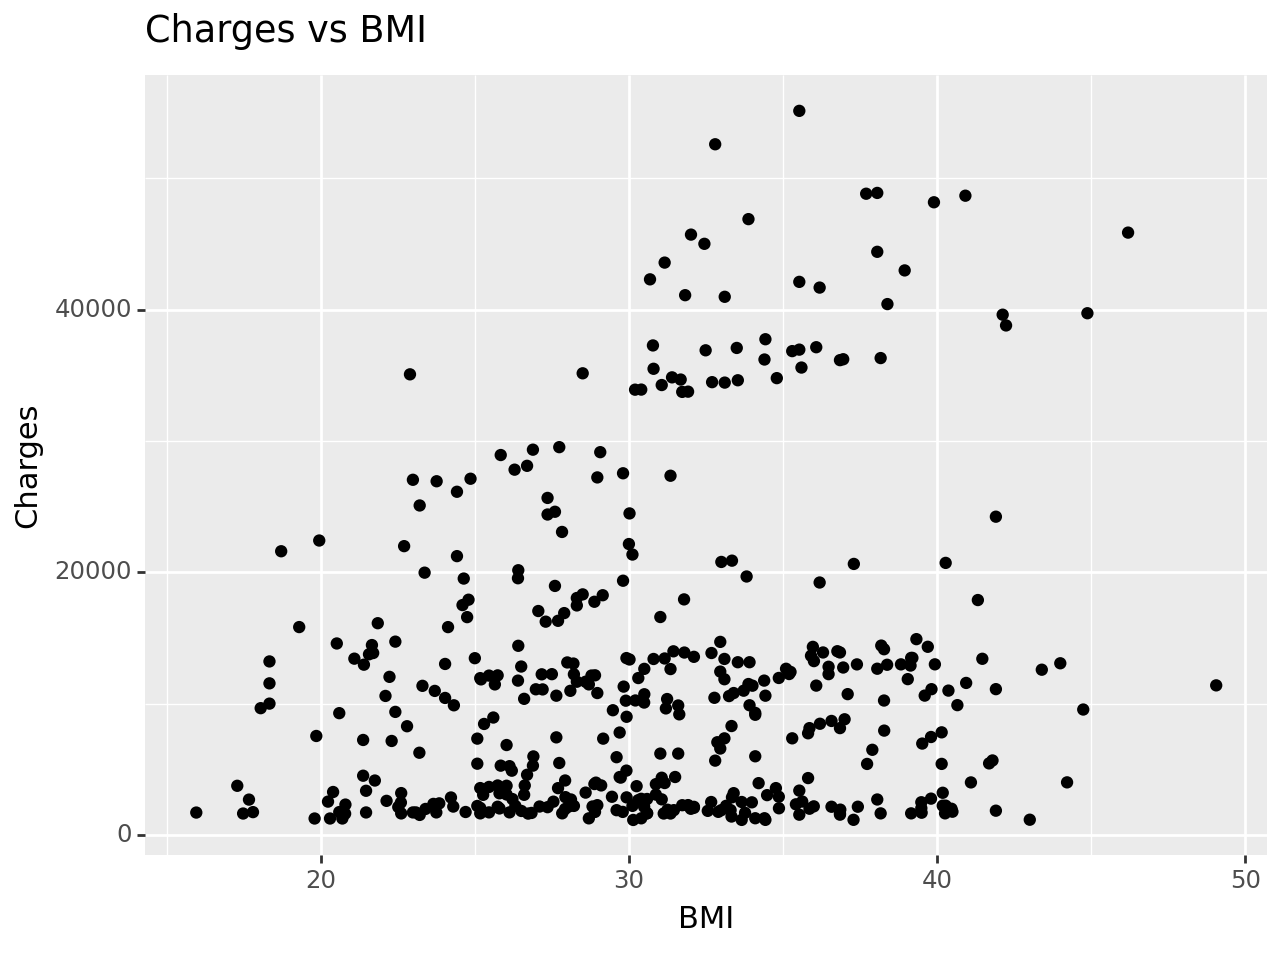

<Figure Size: (640 x 480)>

In [9]:
# Charges vs. BMI plot
plot2 = (ggplot(costs, aes(x='bmi', y='charges'))
    + geom_point()
    + labs(title='Charges vs BMI', x='BMI', y='Charges')
)
plot2

Once again, it does look like there are 2-3 different trends occuring in this data, a positively correlated group as BMI increased, a horizontal group of data where charges are very low, then a group that is more spread out just above the low charged group.  It is apparent that there is at least a slight positive correlation between BMI and charges.

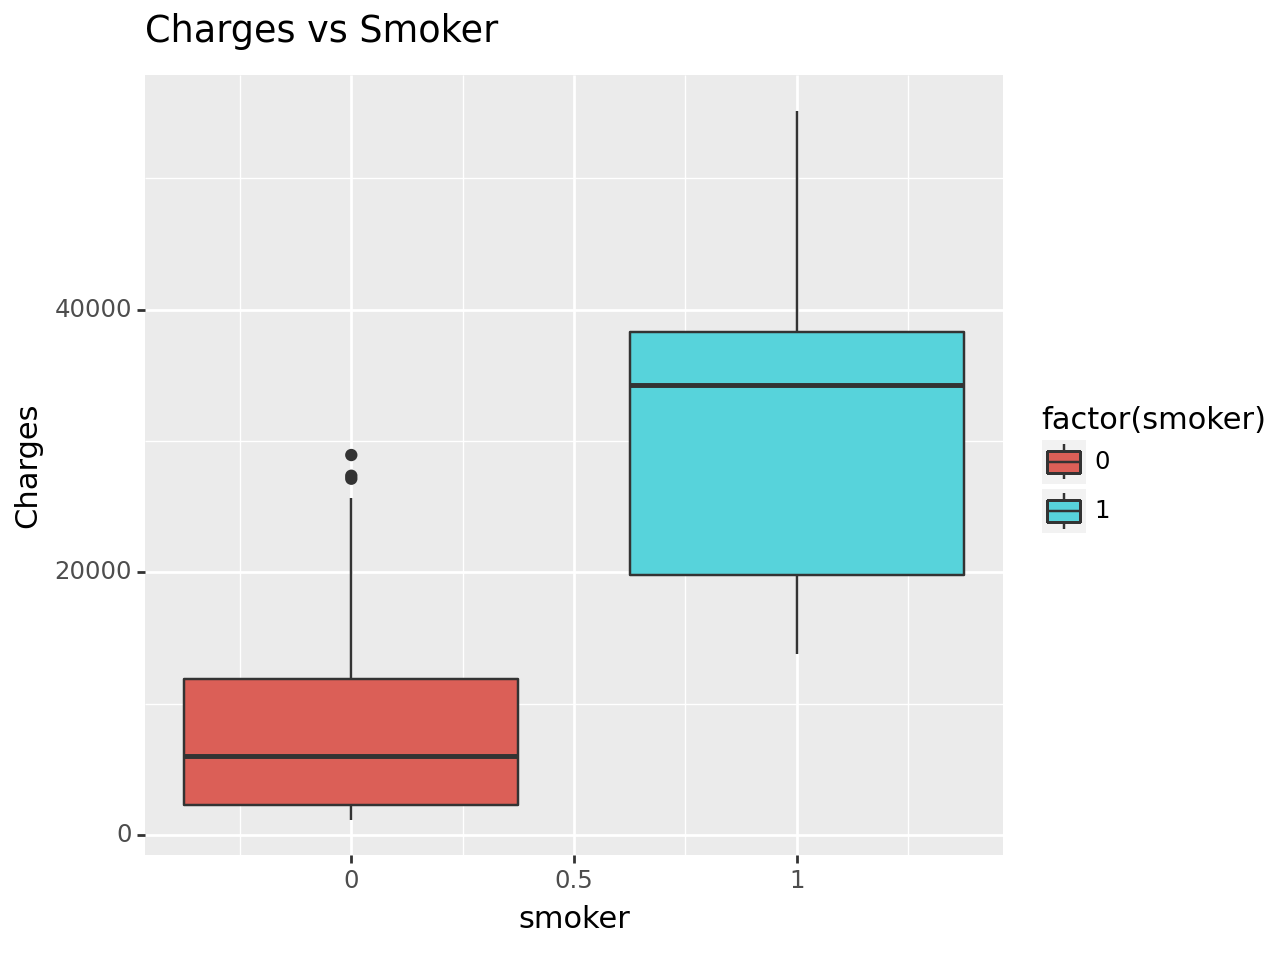

<Figure Size: (640 x 480)>

In [10]:
# Charges vs. Smoker plot
plot3 = (ggplot(costs, aes(x='smoker', y='charges', fill='factor(smoker)'))
    + geom_boxplot()
    + labs(title='Charges vs Smoker', x='smoker', y='Charges')
)
plot3

From this box plot, we are given a very telling story about the effect of smoking on health insurance charges.  It is clear from the graph, that being a smoker corresonds with much higher charges.  It would be interesting to go back and color the points from the previous graphs by smoker status.

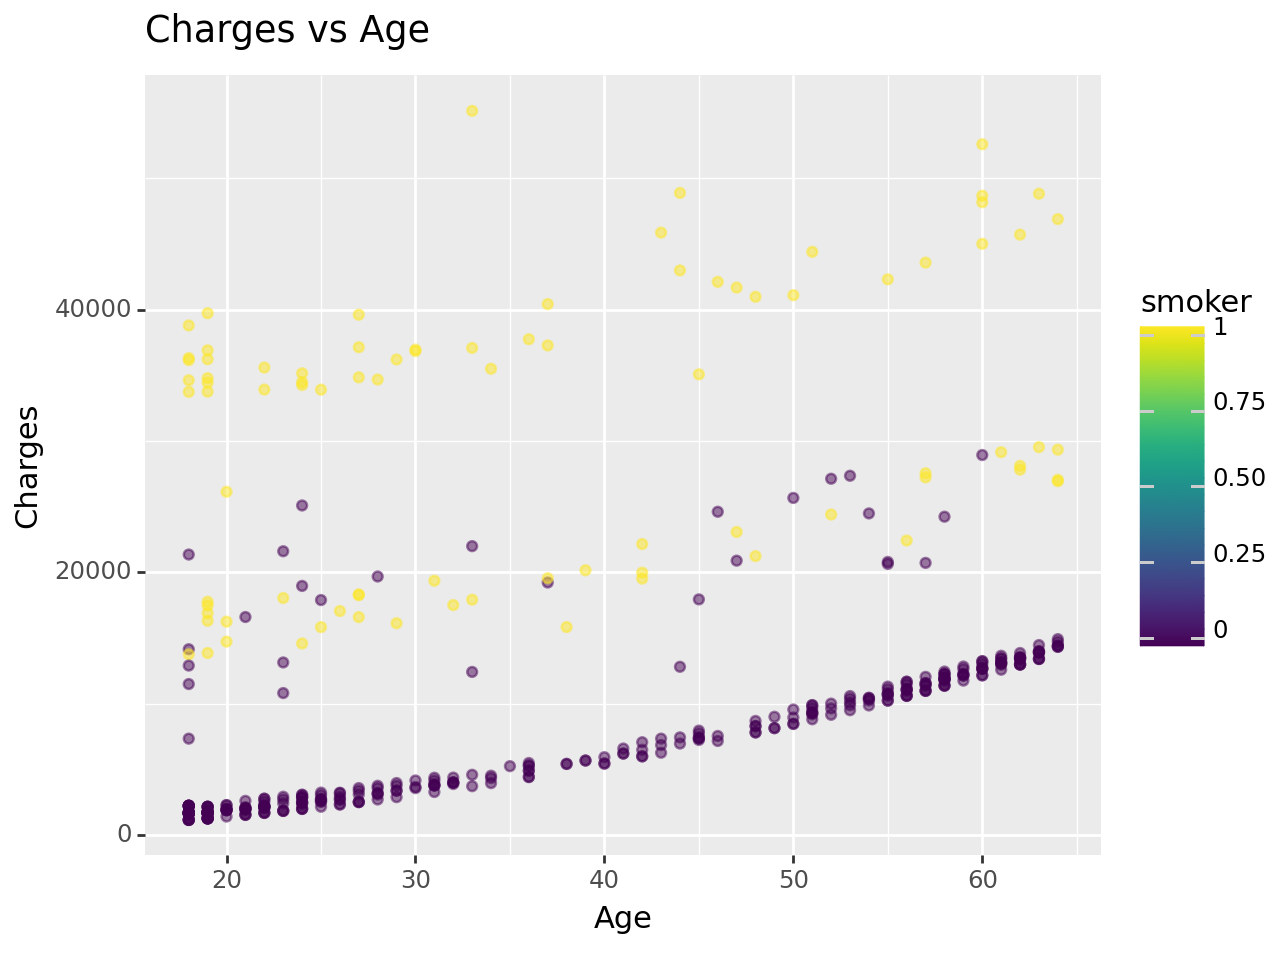

<Figure Size: (640 x 480)>

In [11]:
# Charges vs. age plot with points colored by smoker/non-smoker
plot1 = (ggplot(costs, aes(x='age', y='charges'))
    + geom_point(aes(color='smoker'), alpha=0.5)
    + labs(title='Charges vs Age', x='Age', y='Charges')
)
plot1

This scatterplot tells us a far more complete story than the one above.  We can see that the highest group of charges all came from smokers, while the lowest group of charges is comprised of non-smokers.

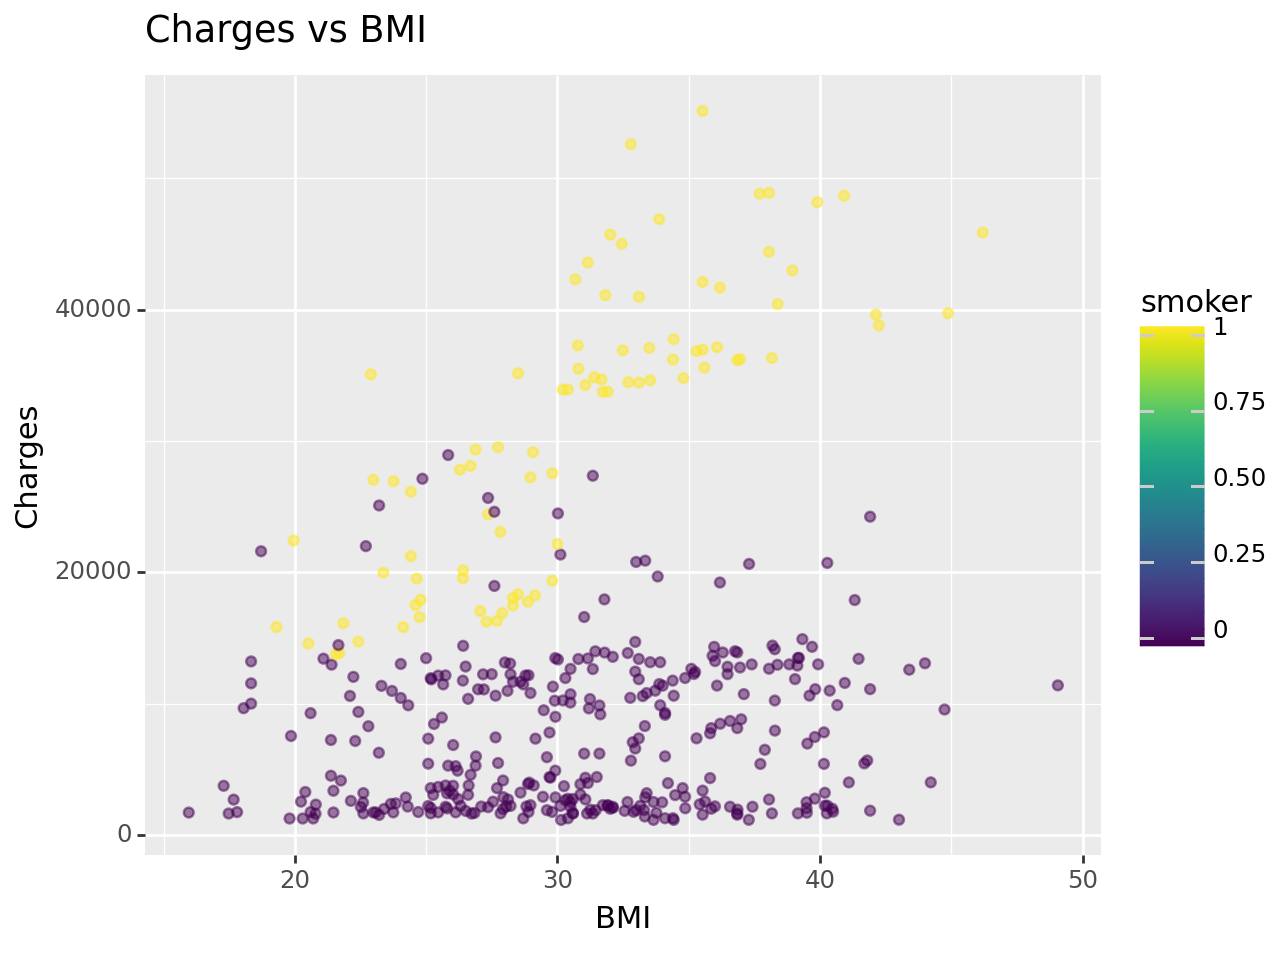

<Figure Size: (640 x 480)>

In [12]:
# Charges vs. BMI plot with points colored by smoker/non-smoker
plot2 = (ggplot(costs, aes(x='bmi', y='charges'))
    + geom_point(aes(color='smoker'), alpha=0.5)
    + labs(title='Charges vs BMI', x='BMI', y='Charges')
)
plot2

Again, this scatterplot is much more telling than the one above.  You can see that Charges and BMI has a strong positive correlation for individuals who smoke, whereas that correlation is not so strong for those who do not smoke

**Part Two: Simple Linear Models**

1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [13]:
import statsmodels.api as sm

# model to predict charges from age
X = sm.add_constant(costs['age'])
y = costs['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     47.34
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.12e-11
Time:                        01:41:24   Log-Likelihood:                -4632.3
No. Observations:                 431   AIC:                             9269.
Df Residuals:                     429   BIC:                             9277.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3611.7588   1374.386      2.628      0.009     910.391    6313.126
age          228.7990     33.254      6.880      0.000     163.438     294.160
==============================================================================
Omnibus:                      137.479   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.807
Skew:                           1.763   Prob(JB):                     5.26e-63
Kurtosis:                       4.881   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-squared value of 0.099 is very low, indicating that age alone is not a very good predictor of charges.  The p-value of age is significant, so this suggests that this is statistically significant in predicting charges.  In discussing the coefficients, the first is the intercept coefficient 1374, which represents the estimated insurance charge for someone aged zero (which is unrealistic).  The coefficient for age, 228, indicates the amount that insurance charges increase every additional year of living.

2. Make a model that also incorporates the variable sex. Report your results.

In [14]:
# model to predict charges from age and sex
X = sm.add_constant(costs[['age', 'sex_male']])
y = costs['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     23.81
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.57e-10
Time:                        01:41:26   Log-Likelihood:                -4632.1
No. Observations:                 431   AIC:                             9270.
Df Residuals:                     428   BIC:                             9282.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3315.3323   1462.397      2.267      0.024     440.959    6189.706
age          228.4259     33.285      6.863      0.000     163.004     293.848
sex_male     649.8326   1089.136      0.597      0.551   -1490.889    2790.554
==============================================================================
Omnibus:                      137.192   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.978
Skew:                           1.759   Prob(JB):                     7.95e-63
Kurtosis:                       4.884   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now looking at the adjusted R-squared value, as we have added a new independent variable, it has actually decreased to 0.096, meaning that the added variable sex_male does not perform as good as the model with age alone.  The intercept and age coefficient (3315 and 228, respectively) would be interpreted as they were in the last question, with new variable sex_male having coefficient 649.  This coefficient indicates that being male increases your charges by 649, though this coefficient is not statistically significant with a p-value of 0.551.  Adding sex_male does not improve the model's explanatory power.

3. Now make a model that does not include sex, but does include smoker. Report your results.

In [15]:
# model to predict charges with age and smoker
X = sm.add_constant(costs[['age', 'smoker']])
y = costs['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     679.1
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.65e-133
Time:                        01:41:29   Log-Likelihood:                -4347.0
No. Observations:                 431   AIC:                             8700.
Df Residuals:                     428   BIC:                             8712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2166.8523    729.397     -2.971      0.003   -3600.499    -733.206
age          253.1454     17.187     14.729      0.000     219.363     286.927
smoker      2.405e+04    699.888     34.361      0.000    2.27e+04    2.54e+04
==============================================================================
Omnibus:                       64.886   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.897
Skew:                           0.804   Prob(JB):                     4.19e-31
Kurtosis:                       5.281   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model performs much better than the past 2.  We can see that the adjusted R-squared value of 0.759 is much higher than the R-squared values from the past models.  The intercept coefficient is now negative and still has a significant p-value.  You would interpret the age coefficient (253) the same as before, and it too is statistically significant.  The smoker coefficient, which is also statistically significant, reveals that you can expect to pay on average $24050 more if you smoke than you would if you didn't(!).

4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [16]:
from sklearn.metrics import mean_squared_error

# MSE for Q3 model
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mse

33719831.46524372

In [16]:
X = sm.add_constant(costs[['age', 'sex_male']])
y = costs['charges']

model = sm.OLS(y, X).fit()

# MSE for Q2 model
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mse

126633939.67937087

The Model from Q3 better fits the data based on both R-squared and MSE values.  The R-squared value for Q3 Model (0.76) is much higher than the R-squared for the Q2 Model (0.100), and the MSE for the Q3 Model is smaller (33,719,831) than the MSE for the Q2 Model (126,633,939).

**Part Three: Multiple Linear Models**

Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [17]:
# Model with age and bmi as predictors
X = sm.add_constant(costs[['age', 'bmi']])
y = costs['charges']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     29.27
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.22e-12
Time:                        01:41:33   Log-Likelihood:                -4627.2
No. Observations:                 431   AIC:                             9260.
Df Residuals:                     428   BIC:                             9273.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4627.5334   2917.604     -1.586      0.113   -1.04e+04    1107.081
age          216.2972     33.136      6.528      0.000     151.168     281.426
bmi          283.2038     88.725      3.192      0.002     108.813     457.595
==============================================================================
Omnibus:                      117.347   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.932
Skew:                           1.598   Prob(JB):                     7.83e-48
Kurtosis:                       4.366   Cond. No.                         276.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# MSE for age and bmi model
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mse

123792439.58129103

In [19]:
X = sm.add_constant(costs['age'])
y = costs['charges']

model = sm.OLS(y, X).fit()

# MSE for Q1 model
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mse

126739267.91026388

The MSE is comparable for this model (123792439) and the P2 Q1 model MSE (126739267), but is lower for this model with age and bmi as predictors. The adjusted R-squared for the model using age and bmi as predictors (0.116) is higher than the model in P2 Q1 (0.099), indicating the this model has a better fit.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [20]:
# Add age_squared column
costs['age_squared'] = costs['age'] ** 2

X = sm.add_constant(costs[['age', 'age_squared']])
y = costs['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     23.67
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.78e-10
Time:                        01:41:38   Log-Likelihood:                -4632.2
No. Observations:                 431   AIC:                             9270.
Df Residuals:                     428   BIC:                             9283.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2299.7306   4413.848      0.521      0.603   -6375.785     1.1e+04
age           308.4282    256.705      1.201      0.230    -196.130     812.987
age_squared    -1.0015      3.201     -0.313      0.755      -7.294       5.291
==============================================================================
Omnibus:                      137.039   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.185
Skew:                           1.759   Prob(JB):                     1.18e-62
Kurtosis:                       4.872   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# MSE for age and age^2 model
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mse

126710293.80956802

The MSE is really close for this model (126710293) and the P2 Q1 model MSE (126739267), but is slightly lower for this model with age and age^2 as predictors. The adjusted R-squared for the model using age and bmi as predictors (0.095) is lower than the model in P2 Q1 (0.099), indicating the the model from P2 Q1 has a better fit.  The model in P3 Q1 is a better model than both.

In [22]:
# Drop column 'age_squared'
costs = costs.drop('age_squared', axis=1)

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [23]:
# Add columns for polynomial terms
costs['age2'] = costs['age'] ** 2
costs['age3'] = costs['age'] ** 3
costs['age4'] = costs['age'] ** 4

X = sm.add_constant(costs[['age', 'age2', 'age3', 'age4']])
y = costs['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     12.87
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           6.68e-10
Time:                        01:41:44   Log-Likelihood:                -4630.3
No. Observations:                 431   AIC:                             9271.
Df Residuals:                     426   BIC:                             9291.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.864e+04   4.29e+04      1.601      0.110   -1.56e+04    1.53e+05
age        -7948.4102   5037.992     -1.578      0.115   -1.79e+04    1954.006
age2         358.1102    208.171      1.720      0.086     -51.059     767.280
age3          -6.4791      3.606     -1.797      0.073     -13.567       0.609
age4           0.0413      0.022      1.852      0.065      -0.003       0.085
==============================================================================
Omnibus:                      134.101   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.389
Skew:                           1.732   Prob(JB):                     2.61e-60
Kurtosis:                       4.810   Cond. No.                     5.66e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# MSE for polynomial model of degree 4
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mse

125550389.64569835

The MSE is lower for this model (125550389) than the P2 Q1 model MSE (126739267). The adjusted R-squared for the model with polynomial model of degree 4 (0.099) is lower than the model in P2 Q1 (0.099), indicating the the model from P2 Q1 has a better fit. The model in P3 Q1 is still the best model thus far.

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [25]:
for i in range(2, 13):
    costs[f'age_{i}'] = costs['age'] ** i

predictors = ['age'] + [f'age_{i}' for i in range(2, 13)]
X = sm.add_constant(costs[predictors])
y = costs['charges']

model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.907
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           8.55e-08
Time:                        01:41:51   Log-Likelihood:                -4631.5
No. Observations:                 431   AIC:                             9279.
Df Residuals:                     423   BIC:                             9312.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.224e-08   2.06e-08      4.482      0.000    5.18e-08    1.33e-07
age         2.869e-05    6.4e-06      4.482      0.000    1.61e-05    4.13e-05
age_2        1.93e-05   4.31e-06      4.482      0.000    1.08e-05    2.78e-05
age_3          0.0003    7.6e-05      4.483      0.000       0.000       0.000
age_4          0.0039      0.001      4.484      0.000       0.002       0.006
age_5          0.0259      0.006      4.488      0.000       0.015       0.037
age_6         -0.0026      0.001     -3.918      0.000      -0.004      -0.001
age_7          0.0001    2.9e-05      3.536      0.000    4.56e-05       0.000
age_8      -2.043e-06   6.27e-07     -3.260      0.001   -3.27e-06   -8.11e-07
age_9       2.022e-08   6.63e-09      3.050      0.002    7.19e-09    3.32e-08
age_10     -7.943e-11   2.76e-11     -2.882      0.004   -1.34e-10   -2.52e-11
age_11     -4.791e-17   1.89e-16     -0.253      0.800    -4.2e-16    3.24e-16
age_12      1.174e-16   1.69e-16      0.696      0.487   -2.14e-16    4.49e-16
==============================================================================
Omnibus:                      132.402   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.964
Skew:                           1.712   Prob(JB):                     3.94e-59
Kurtosis:                       4.803   Cond. No.                     4.16e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+20. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# MSE for polynomial model of degree 12
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mse

126288894.53704467

The MSE is slightly lower for this model (126288894) than the P2 Q1 model MSE (126739267). The adjusted R-squared for the model with polynomial model of degree 4 (0.088) is lower than the model in P2 Q1 (0.099), indicating the the model from P2 Q1 has a better fit. The model in P3 Q1 is still the best model.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

From those that we have created so far, the best model comes from P3 Q1 using age and bmi as predictors.  This is because it had a reletively low MSE, and the highest R-Squared value of those that we have done.  That being said, an R-Squared value of 0.116 is still not very good, so I'm sure there will be a model that outperforms this one.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

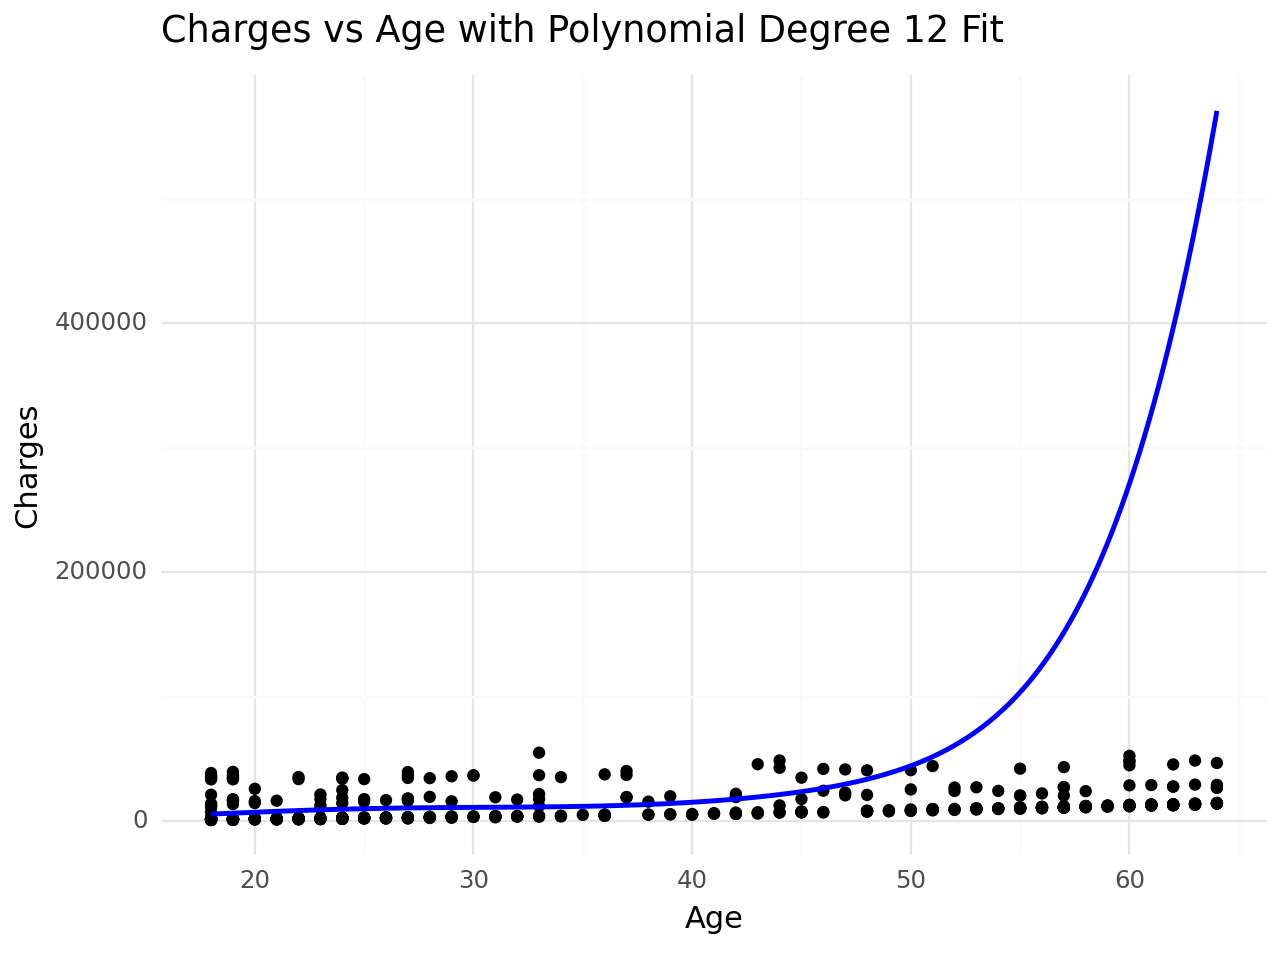

<Figure Size: (640 x 480)>

In [27]:
import numpy as np
age_values_for_prediction = np.linspace(costs['age'].min(), costs['age'].max(), num=len(costs))
X_new = sm.add_constant(pd.DataFrame({f'age_{i}': age_values_for_prediction**i for i in range(1, 13)}))

# Use the model to predict 'charges' for these 'age' values
predictions = model.predict(X_new)

charge_predictions = pd.DataFrame({
    'age': age_values_for_prediction,
    'predicted_charges': predictions
})


predictions_plot = (
    ggplot(costs, aes(x='age', y='charges')) +
    geom_point(aes()) +  # Original data points with color for smoker
    geom_line(charge_predictions, aes(x='age', y='predicted_charges'), color='blue', size=1) +  # Predicted polynomial line
    labs(title='Charges vs Age with Polynomial Degree 12 Fit', x='Age', y='Charges') +
    theme_minimal()
)

predictions_plot

It clearly does not not a good job in predicting the data.

**Part Four: New data**

Consider the following possible models:

*   Only age as a predictor. (Model1)

*   age and bmi as a predictor. (Model2)

*   age, bmi, and smoker as predictors (no interaction terms). (Model3)

*   age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker). (Model4)

*   age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker). (Model5)

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

In [28]:
# Load new data
costs2 = pd.read_csv('/content/drive/My Drive/insurance_costs_2.csv')

In [29]:
costs2 = pd.concat([costs2, pd.get_dummies(costs2['sex'], drop_first=True, prefix='sex')], axis=1)
costs2 = costs2.drop('sex', axis=1)
costs2 = pd.concat([costs2, pd.get_dummies(costs2['smoker'], drop_first=True, prefix='smoker')], axis=1)
costs2 = costs2.drop('smoker', axis=1)
costs2 = costs2.dropna()
costs2 = costs2.rename(columns={'smoker_yes': 'smoker'})

In [30]:
costs2.head()

,age,bmi,region,charges,sex_male,smoker
0,23,34.400,southwest,1826.84300,1,0
1,56,40.300,southwest,10602.38500,1,0
2,18,34.100,southeast,1137.01100,1,0
3,63,23.085,northeast,14451.83515,0,0
4,63,28.310,northwest,13770.09790,1,0


In [31]:
# Model1
X = sm.add_constant(costs['age'])
y = costs['charges']

model1 = sm.OLS(y, X).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age']])
predictions_new = model1.predict(X_new)

# Find MSE
y_new = costs2['charges']
mse1 = mean_squared_error(y_new, predictions_new)
mse1

136077136.50195494

In [32]:
from sklearn.metrics import r2_score
# Find R-Squared
r2_score(y_new, predictions_new)

0.12236515675533055

In [33]:
# Model2
X = sm.add_constant(costs[['age', 'bmi']])
y = costs['charges']

model2 = sm.OLS(y, X).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age', 'bmi']])
predictions_new = model2.predict(X_new)

# Find MSE
y_new = costs2['charges']
mse2 = mean_squared_error(y_new, predictions_new)
mse2

132636406.1108129

In [34]:
# Find R-Squared
r2_score(y_new, predictions_new)

0.14455628272331222

In [35]:
# Model3
X = sm.add_constant(costs[['age', 'bmi', 'smoker']])
y = costs['charges']

model3 = sm.OLS(y, X).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age', 'bmi', 'smoker']])
predictions_new = model3.predict(X_new)

# Find MSE
y_new = costs2['charges']
mse3 = mean_squared_error(y_new, predictions_new)
mse3

35377541.24141632

In [36]:
# Find R-Squared
r2_score(y_new, predictions_new)

0.7718311565047801

In [37]:
import statsmodels.formula.api as smf

# Model4
formula = 'charges ~ age + bmi + (age + bmi)*smoker'
model4 = smf.ols(formula, data=costs).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age', 'bmi', 'smoker']])
predictions_new = model4.predict(X_new)

# Find MSE
y_new = costs2['charges']
mse4 = mean_squared_error(y_new, predictions_new)
mse4

21786256.866852548

In [38]:
# Find R-Squared
r2_score(y_new, predictions_new)

0.8594886795699618

In [39]:
# Model5
formula = 'charges ~ age + bmi + smoker + (age + bmi)*smoker'
model5 = smf.ols(formula, data=costs).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age', 'bmi', 'smoker']])
predictions_new = model5.predict(X_new)

# Find MSE
y_new = costs2['charges']
mse5 = mean_squared_error(y_new, predictions_new)
mse5

21786256.866852548

In [40]:
# Find R-Squared
r2_score(y_new, predictions_new)

0.8594886795699618

It is clear from the high R-Squared values and lower MSE's that the last 2 models perform the best.  They are identicle in all values (I cannot seem to use age and bmi as predictors with an interaction term without also including the interaction term as a predictor).  With an R-Squared value of 0.859 and an MSE of 21786256, they blow the rest of the previous models out of the water.

Make a plot showing the residuals of your final chosen model.

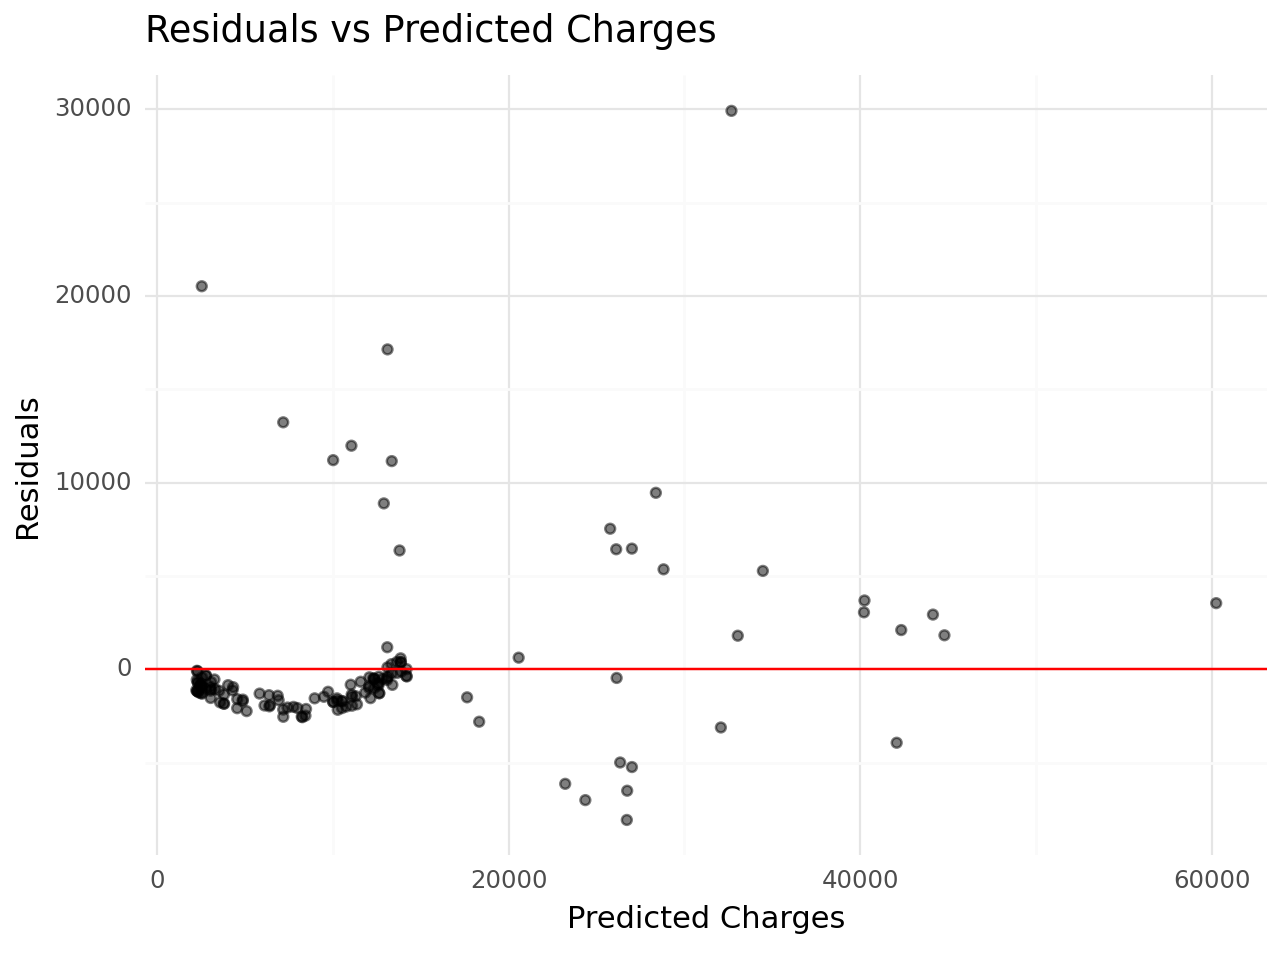

<Figure Size: (640 x 480)>

In [41]:
# Find residuals
residuals = y_new - predictions_new
residuals_df = pd.DataFrame({'Predicted': predictions_new, 'Residuals': residuals})

# Plot residuals
residual_plot = (
    ggplot(residuals_df, aes(x='Predicted', y='Residuals'))
    + geom_point(alpha=0.5)
    + geom_hline(yintercept=0, color='red')
    + labs(title='Residuals vs Predicted Charges', x='Predicted Charges', y='Residuals')
    + theme_minimal())
residual_plot

**Part Five: Full Exploration**

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [42]:
# Find best model
formula = 'charges ~ age + bmi + smoker + (age + bmi + region)*smoker'
model = smf.ols(formula, data=costs).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age', 'bmi', 'smoker', 'region']])
predictions_new = model.predict(X_new)

# Find MSE
y_new = costs2['charges']
mse = mean_squared_error(y_new, predictions_new)
mse

23411086.102634218

In [43]:
# Find R-Squared
r2_score(y_new, predictions_new)

0.8490092795156836

In [44]:
# Find best model
formula = 'charges ~ age + bmi + smoker + (age + bmi)*smoker + region'
model = smf.ols(formula, data=costs).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age', 'bmi', 'smoker', 'region']])
predictions_new = model.predict(X_new)

# Find MSE
y_new = costs2['charges']
mse = mean_squared_error(y_new, predictions_new)
mse

22245634.34988411

In [45]:
# Find R-Squared
r2_score(y_new, predictions_new)

0.8565259064276511

In [49]:
# Find best model
formula = 'charges ~ I(age**2) + bmi + smoker + (I(age**2) + bmi)*smoker'
model = smf.ols(formula, data=costs).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age', 'bmi', 'smoker', 'region']])
predictions_new = model.predict(X_new)

# Find MSE
y_new = costs2['charges']
mse = mean_squared_error(y_new, predictions_new)
mse

21775456.60350206

In [50]:
# Find R-Squared
r2_score(y_new, predictions_new)

0.8595583362931724

In [124]:
# Find best model
formula = 'charges ~ age + I(bmi**2) + smoker + (age + I(bmi**2))*smoker'
model = smf.ols(formula, data=costs).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age', 'bmi', 'smoker', 'region']])
predictions_new = model.predict(X_new)

# Find MSE
y_new = costs2['charges']
mse = mean_squared_error(y_new, predictions_new)
mse

22340732.196746968

In [125]:
# Find R-Squared
r2_score(y_new, predictions_new)

0.8559125691244871

In [126]:
# Find best model
formula = 'charges ~ I(age**3) + bmi + smoker + (I(age**3) + bmi)*smoker'
model = smf.ols(formula, data=costs).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age', 'bmi', 'smoker', 'region']])
predictions_new = model.predict(X_new)

# Find MSE
y_new = costs2['charges']
mse = mean_squared_error(y_new, predictions_new)
mse

22506975.173976373

In [128]:
# Find R-Squared
r2_score(y_new, predictions_new)

0.8548403785051676

From the different models I graphed, the best performing one was the one that used age^2, bmi, smoker, and the interaction between smoker with age^2 and BMI.  Form this model, I got an R-Squared value of 0.860 and an MSE of 21775456.

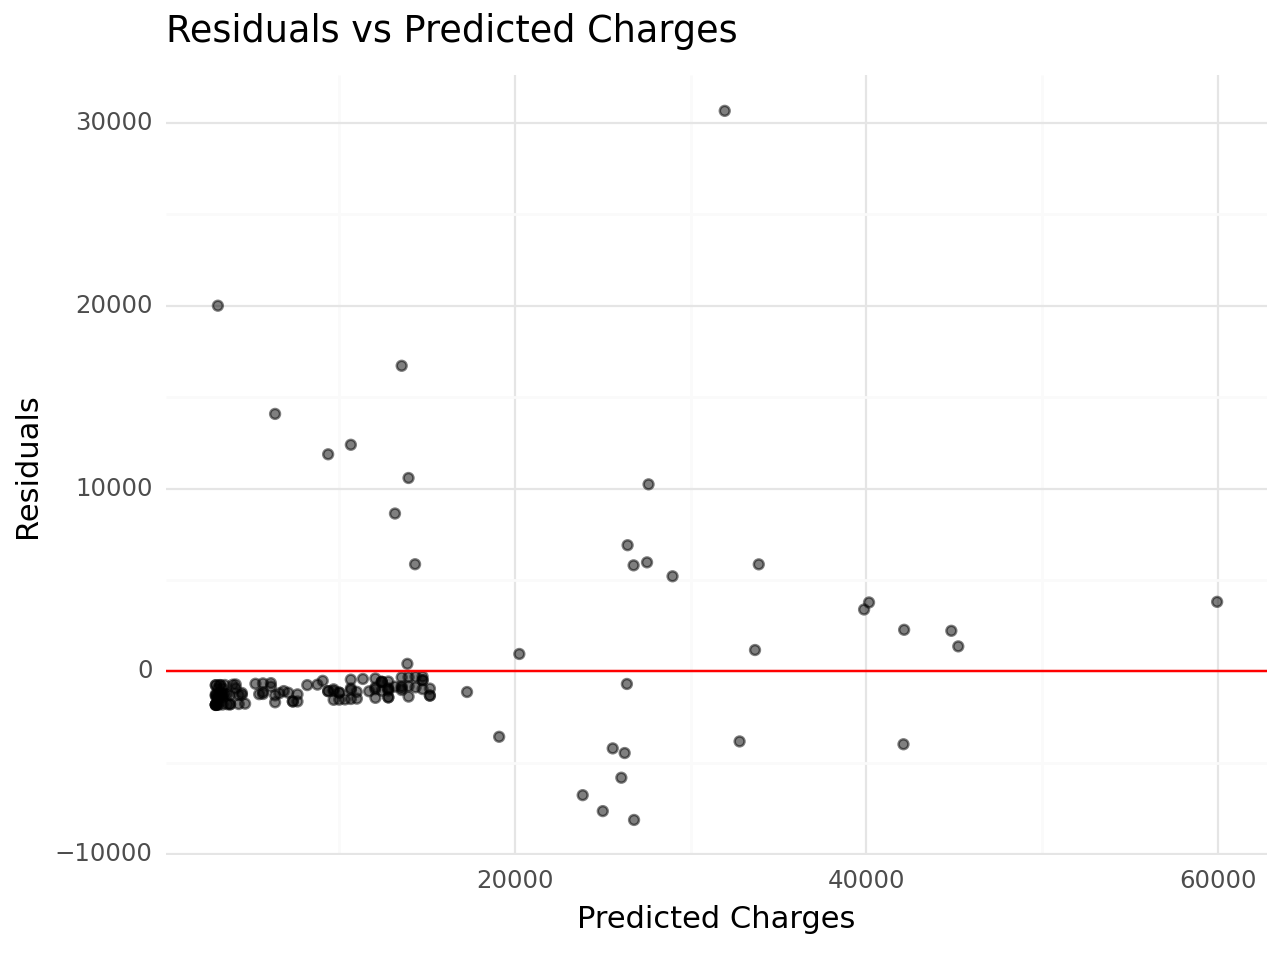

<Figure Size: (640 x 480)>

In [52]:
# Find best model
formula = 'charges ~ I(age**2) + bmi + smoker + (I(age**2) + bmi)*smoker'
model = smf.ols(formula, data=costs).fit()

# Use model to make new predictions of new dataset
X_new = sm.add_constant(costs2[['age', 'bmi', 'smoker', 'region']])
predictions_new = model.predict(X_new)

# Find residuals
residuals = y_new - predictions_new
residuals_df = pd.DataFrame({'Predicted': predictions_new, 'Residuals': residuals})

# Plot residuals
residual_plot = (
    ggplot(residuals_df, aes(x='Predicted', y='Residuals'))
    + geom_point(alpha=0.5)
    + geom_hline(yintercept=0, color='red')
    + labs(title='Residuals vs Predicted Charges', x='Predicted Charges', y='Residuals')
    + theme_minimal())
residual_plot